In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [140]:
def generating_function(u, mu):
    return 0.9*np.sin(u**mu * np.pi)

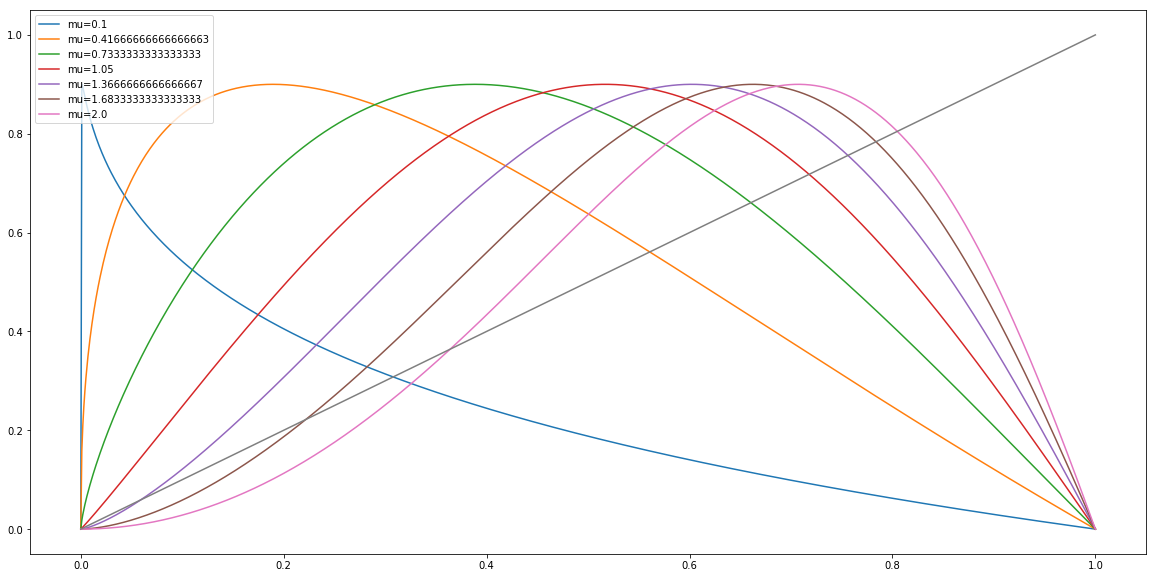

In [154]:
plt.figure(figsize=(20,10))
u_vals=np.linspace(0,1,1000)
for mu in np.linspace(0.1, 2.,7):
    plt.plot(u_vals, generating_function(u_vals, mu), label="mu=%s"%(mu))
    plt.legend()
plt.plot(u_vals, u_vals)

In [142]:
def single_mu_it(n, u, mu):
    iterates = []
    for i in range(n):
        nth_iterate = generating_function(u, mu)
        u=nth_iterate
        iterates.append(nth_iterate)
    return iterates

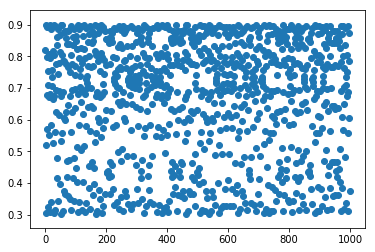

In [143]:
steps=1000
it=single_mu_it(steps, 0.4, 1.1)
it
plt.scatter(range(steps),it)

In [144]:
def stepper(u0, mu0, mu1, N_mu):
    bif_data=[]
    for i in range(N_mu):
        current_mu=mu0+(mu1-mu0)*i/N_mu
        bif_data.append(single_mu_it(spin_up+plot_steps, u0, current_mu)[spin_up:(spin_up+plot_steps)])
    return np.array(bif_data)

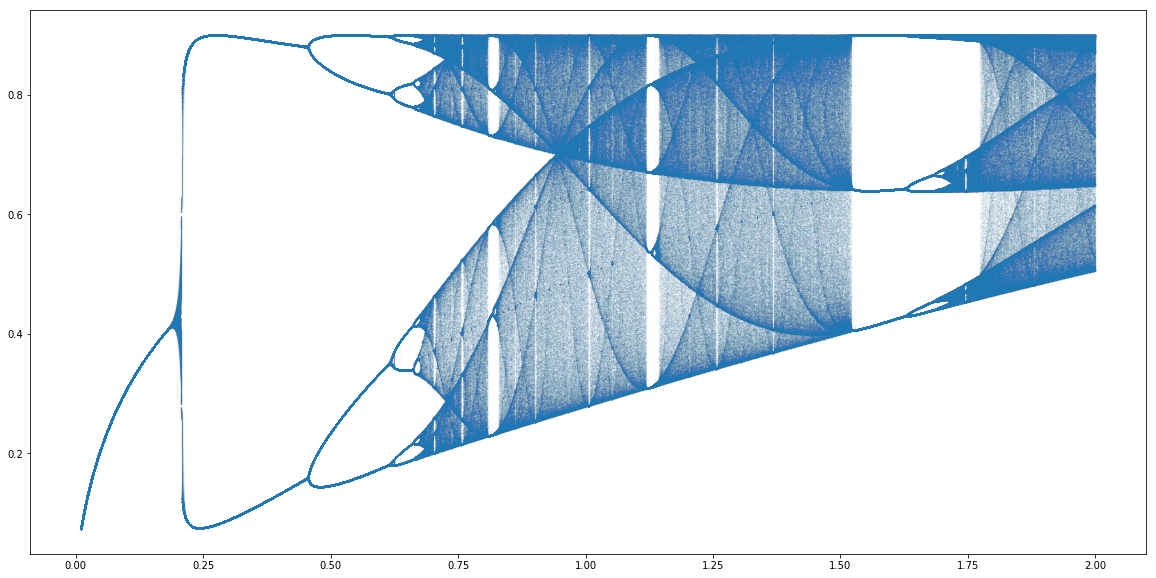

In [145]:
spin_up=100
plot_steps=500
u0=0.6
mu0=0.01
mu1=2.
N_mu=10000
bif_data=stepper(u0, mu0, mu1, N_mu)
mu_range=np.repeat(np.linspace(mu0, mu1, N_mu), plot_steps)
plt.figure(figsize=(20,10))
plt.scatter(mu_range, bif_data, marker='.', s=0.001)

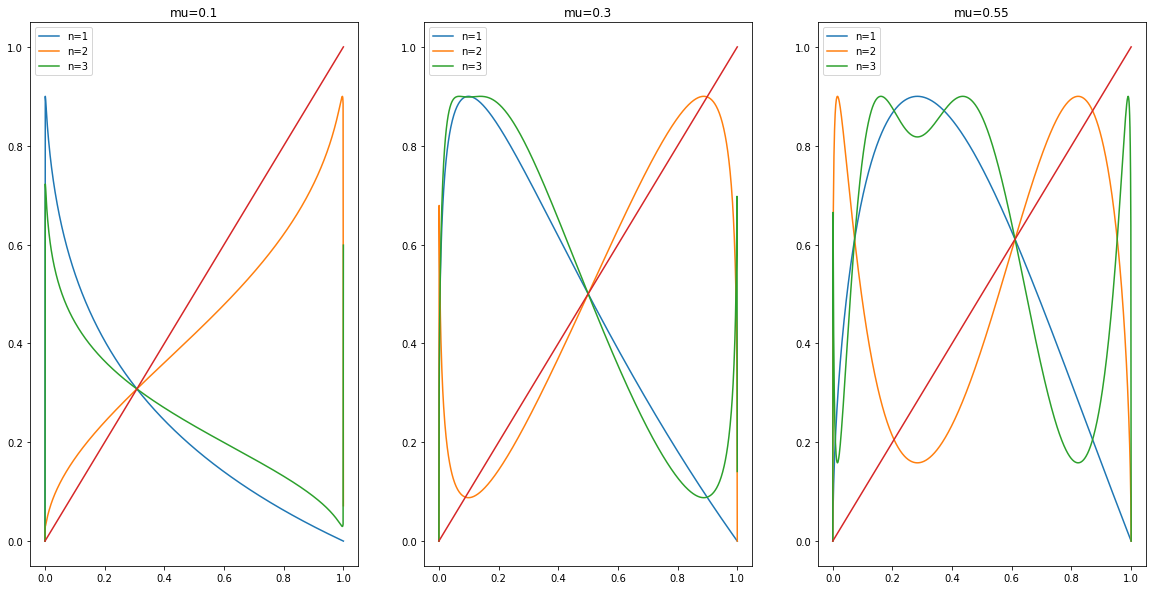

In [182]:
def nth_iterate(n, u, mu):
    for i in range(n):
        u=generating_function(u, mu)
    return u
plt.figure(figsize=(20,10))
i=1
for mu in [0.1, 0.3, 0.55]:
    plt.subplot(1,3,i )
    for n in [1,2,3]:
        plt.plot(u_vals, nth_iterate(n,u_vals,mu))
        plt.legend( ["n=1","n=2","n=3"])
    plt.title("mu=%s"%(mu))
    plt.plot(u_vals, u_vals)
    i=i+1